In [5]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.preprocessing import Normalizer
from scipy.sparse import hstack
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

import seaborn as sns

from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression

### Importing data

In [0]:
from google.colab import drive
drive.mount('gdrive')

Drive already mounted at gdrive; to attempt to forcibly remount, call drive.mount("gdrive", force_remount=True).


In [40]:
train = pd.read_csv(r'/content/gdrive/My Drive/train.csv')
#train = pd.read_csv('train.csv')

In [41]:
test = pd.read_csv(r'/content/gdrive/My Drive/test.csv')
#test = pd.read_csv('test.csv')

In [42]:
train.head(3)

,yrs,empl,spouse,edstr,broke,bal,hm,loan,ctype,day,month,durr,cpgn,days,prev,prev_com,target
0,53,empl_1,1,primary,no,880,no,no,c_0,31,jul,207,4,-1,0,unknown,0
1,52,empl_0,1,secondary,no,979,yes,no,c_0,16,apr,156,1,336,1,other,0
2,39,empl_9,2,tertiary,no,285,no,no,c_0,19,aug,284,2,-1,0,unknown,0


In [43]:
test.head(3)

,yrs,empl,spouse,edstr,broke,bal,hm,loan,ctype,day,month,durr,cpgn,days,prev,prev_com,target
0,75,empl_5,1,primary,no,1765,no,no,c_1,11,mar,282,2,181,2,success,0
1,36,empl_0,2,secondary,no,98,yes,no,c_2,21,may,68,1,-1,0,unknown,0
2,53,empl_5,0,tertiary,no,599,yes,no,c_2,13,may,322,3,-1,0,unknown,0


Is there any missing data?

In [44]:
#Total number of null values in each column
train.isnull().sum(axis = 0)

yrs         0
empl        0
spouse      0
edstr       0
broke       0
bal         0
hm          0
loan        0
ctype       0
day         0
month       0
durr        0
cpgn        0
days        0
prev        0
prev_com    0
target      0
dtype: int64

## Data Preprocessing

### Encoding categorical data: empl, edstr, broke, hm, loan, ctype,day, month, durr, prev_com

In [45]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(train['empl'].values)

train_empl = vectorizer.transform(train['empl'].values)
test_empl = vectorizer.transform(test['empl'].values)

print("After verctorizing")
print(train_empl.shape, test_empl.shape)
print(vectorizer.get_feature_names())

After verctorizing
(36168, 12) (9043, 12)
['empl_0', 'empl_1', 'empl_10', 'empl_11', 'empl_2', 'empl_3', 'empl_4', 'empl_5', 'empl_6', 'empl_7', 'empl_8', 'empl_9']


In [46]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(train['edstr'].values)

train_edstr = vectorizer.transform(train['edstr'].values)
test_edstr = vectorizer.transform(test['edstr'].values)

print("After verctorizing")
print(train_edstr.shape, test_edstr.shape)
print(vectorizer.get_feature_names())

After verctorizing
(36168, 4) (9043, 4)
['primary', 'secondary', 'tertiary', 'unknown']


In [47]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(train['broke'].values)

train_broke = vectorizer.transform(train['broke'].values)
test_broke = vectorizer.transform(test['broke'].values)

print("After verctorizing")
print(train_broke.shape, test_broke.shape)
print(vectorizer.get_feature_names())

After verctorizing
(36168, 2) (9043, 2)
['no', 'yes']


In [48]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(train['hm'].values)

train_hm = vectorizer.transform(train['hm'].values)
test_hm = vectorizer.transform(test['hm'].values)

print("After verctorizing")
print(train_hm.shape, test_hm.shape)
print(vectorizer.get_feature_names())

After verctorizing
(36168, 2) (9043, 2)
['no', 'yes']


In [49]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(train['loan'].values)

train_loan = vectorizer.transform(train['loan'].values)
test_loan = vectorizer.transform(test['loan'].values)

print("After verctorizing")
print(train_loan.shape, test_loan.shape)
print(vectorizer.get_feature_names())

After verctorizing
(36168, 2) (9043, 2)
['no', 'yes']


In [50]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(train['ctype'].values)

train_ctype = vectorizer.transform(train['ctype'].values)
test_ctype = vectorizer.transform(test['ctype'].values)

print("After verctorizing")
print(train_ctype.shape, test_ctype.shape)
print(vectorizer.get_feature_names())

After verctorizing
(36168, 3) (9043, 3)
['c_0', 'c_1', 'c_2']


In [51]:
from sklearn.preprocessing import OneHotEncoder 
  
# creating one hot encoder object with categorical feature 0 
# indicating the first column 
onehotencoder = OneHotEncoder() 
train_day= train['day'].values
train_day = train_day.reshape(-1,1)

test_day= test['day'].values
test_day = test_day.reshape(-1,1)

train_day = onehotencoder.fit_transform(train_day).toarray()
test_day = onehotencoder.transform(test_day).toarray()

print("After encoding")
print(train_day.shape, test_day.shape)
print(onehotencoder.get_feature_names())

After encoding
(36168, 31) (9043, 31)
['x0_1' 'x0_2' 'x0_3' 'x0_4' 'x0_5' 'x0_6' 'x0_7' 'x0_8' 'x0_9' 'x0_10'
 'x0_11' 'x0_12' 'x0_13' 'x0_14' 'x0_15' 'x0_16' 'x0_17' 'x0_18' 'x0_19'
 'x0_20' 'x0_21' 'x0_22' 'x0_23' 'x0_24' 'x0_25' 'x0_26' 'x0_27' 'x0_28'
 'x0_29' 'x0_30' 'x0_31']


In [52]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(train['month'].values)

train_month = vectorizer.transform(train['month'].values)
test_month = vectorizer.transform(test['month'].values)

print("After verctorizing")
print(train_month.shape, test_month.shape)
print(vectorizer.get_feature_names())

After verctorizing
(36168, 12) (9043, 12)
['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


In [53]:
vectorizer = CountVectorizer(binary=True)
vectorizer.fit(train['prev_com'].values)

train_pcom = vectorizer.transform(train['prev_com'].values)
test_pcom = vectorizer.transform(test['prev_com'].values)

print("After verctorizing")
print(train_pcom.shape, test_pcom.shape)
print(vectorizer.get_feature_names())

After verctorizing
(36168, 4) (9043, 4)
['failure', 'other', 'success', 'unknown']


### Scaling Numerical values

In [54]:
scalar = Normalizer()
scalar.fit(train['yrs'].values.reshape(-1,1))

train_yrs = scalar.transform(train['yrs'].values.reshape(-1, 1))
test_yrs = scalar.transform(test['yrs'].values.reshape(-1, 1))

In [55]:
scalar = Normalizer()
scalar.fit(train['bal'].values.reshape(-1,1))

train_bal = scalar.transform(train['bal'].values.reshape(-1, 1))
test_bal = scalar.transform(test['bal'].values.reshape(-1, 1))

In [56]:
train_spouse = train['spouse'].values.reshape(-1, 1)
test_spouse = test['spouse'].values.reshape(-1, 1)

In [57]:
scalar = Normalizer()
scalar.fit(train['durr'].values.reshape(-1,1)) 

train_durr = scalar.transform(train['durr'].values.reshape(-1, 1))
test_durr = scalar.transform(test['durr'].values.reshape(-1, 1))

In [58]:
scalar = Normalizer()
scalar.fit(train['cpgn'].values.reshape(-1,1)) 

train_cpgn = scalar.transform(train['cpgn'].values.reshape(-1, 1))
test_cpgn = scalar.transform(test['cpgn'].values.reshape(-1, 1))

In [59]:
scalar = Normalizer()
scalar.fit(train['days'].values.reshape(-1,1)) 

train_days = scalar.transform(train['days'].values.reshape(-1, 1))
test_days = scalar.transform(test['days'].values.reshape(-1, 1))

In [60]:
train_prev = train['prev'].values.reshape(-1, 1)
test_prev = test['prev'].values.reshape(-1, 1)

### Hstacking the features

In [125]:
y_train = train['target']
y_train.shape

(36168,)

In [126]:
y_test = test['target']
y_test.shape

(9043,)

In [127]:
X_train = hstack((train_yrs,train_empl,train_spouse,train_edstr,train_broke,train_bal,train_hm,train_loan,train_ctype,train_day,train_month,train_durr,train_cpgn,train_days,train_prev,train_pcom))
X_train.shape

(36168, 79)

In [128]:
X_test = hstack((test_yrs,test_empl,test_spouse,test_edstr,test_broke,test_bal,test_hm,test_loan,test_ctype,test_day,test_month,test_durr,test_cpgn,test_days,test_prev,test_pcom))
X_test.shape

(9043, 79)

## Creating Machine learning models and Hyperparameter tuning using RandomsearchCV

In [65]:
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

### 1 .Logistic regression

In [0]:
x_cfl=SGDClassifier(loss='log',class_weight='balanced')

param={
    'alpha':[0.0001, 0.0005, 0.001,0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 5, 10, 20, 50, 100, 500,1000,10000]
}

random_cfl=RandomizedSearchCV(x_cfl,param_distributions=param,verbose=10)
random_cfl.fit(X_train, y)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=50 ........................................................
[CV] ............................ alpha=50, score=0.763, total=   0.1s
[CV] alpha=50 ........................................................
[CV] ............................ alpha=50, score=0.766, total=   0.0s
[CV] alpha=50 ........................................................
[CV] ............................ alpha=50, score=0.763, total=   0.0s
[CV] alpha=50 ........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


[CV] ............................ alpha=50, score=0.760, total=   0.1s
[CV] alpha=50 ........................................................
[CV] ............................ alpha=50, score=0.768, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................... alpha=500, score=0.797, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................... alpha=500, score=0.788, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................... alpha=500, score=0.795, total=   0.0s
[CV] alpha=500 .......................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s remaining:    0.0s


[CV] ........................... alpha=500, score=0.805, total=   0.0s
[CV] alpha=500 .......................................................
[CV] ........................... alpha=500, score=0.795, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................... alpha=2.0, score=0.739, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................... alpha=2.0, score=0.730, total=   0.1s
[CV] alpha=2.0 .......................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s remaining:    0.0s


[CV] ........................... alpha=2.0, score=0.707, total=   0.1s
[CV] alpha=2.0 .......................................................
[CV] ........................... alpha=2.0, score=0.700, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................... alpha=2.0, score=0.731, total=   0.0s
[CV] alpha=100 .......................................................
[CV] ........................... alpha=100, score=0.776, total=   0.1s
[CV] alpha=100 .......................................................
[CV] ........................... alpha=100, score=0.783, total=   0.1s
[CV] alpha=100 .......................................................
[CV] ........................... alpha=100, score=0.117, total=   0.1s
[CV] alpha=100 .......................................................
[CV] ........................... alpha=100, score=0.788, total=   0.0s
[CV] alpha=100 .......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.6s finished


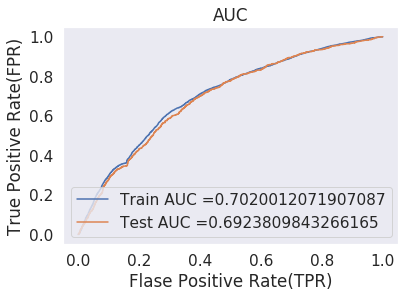

----------------------------------------------------------------------
Train accuracy:  0.8413791196637912
Test accuracy:  0.8365586641601238
----------------------------------------------------------------------
F1-Score on train set: 0.274
F1-Score on test set: 0.260
----------------------------------------------------------------------
the maximum value of tpr*(1-fpr) 0.43306254695717505 for threshold 0.5
Test confusion matrix
[[5523 2455]
 [ 427  638]]


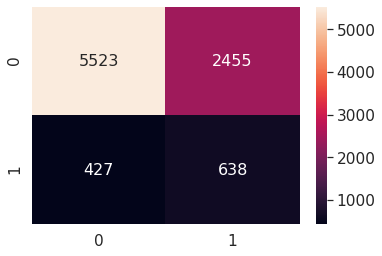

In [0]:
clf = SGDClassifier(alpha = 1000,loss='log',class_weight='balanced')
    
clf.fit(X_train, y_train)

y_train_pred = clf.predict_proba(X_train)[:,1]    
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Flase Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

print("-"*70)


print("Train accuracy: ",clf.score(X_train, y_train))
print("Test accuracy: ",clf.score(X_test, y_test))

print("-"*70)
y_train_new = clf.predict(X_train)
y_test_new = clf.predict(X_test)
print("F1-Score on train set: %0.3f"%(f1_score(y_train, y_train_new)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_test_new)))

print("-"*70)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test confusion matrix")
df_cmte = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)),range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cmte, annot=True,annot_kws={"size": 16}, fmt='g')
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

### 2. Support vector machine

In [0]:
x_cfl=SGDClassifier(loss='hinge',class_weight='balanced')

param={
    'alpha':[0.0001, 0.0005, 0.001,0.005, 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 1.0, 1.5, 2.0, 2.5, 5, 10, 20, 50, 100, 500,1000,10000]
}

random_cfl=RandomizedSearchCV(x_cfl,param_distributions=param,verbose=10)
random_cfl.fit(X_train, y)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] alpha=1.0 .......................................................
[CV] ........................... alpha=1.0, score=0.785, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................... alpha=1.0, score=0.783, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................... alpha=1.0, score=0.788, total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ........................... alpha=1.0, score=0.790, total=   0.0s
[CV] alpha=1.0 .......................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s


[CV] ........................... alpha=1.0, score=0.784, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ............................ alpha=10, score=0.726, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ............................ alpha=10, score=0.677, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ............................ alpha=10, score=0.708, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ............................ alpha=10, score=0.702, total=   0.0s
[CV] alpha=10 ........................................................
[CV] ............................ alpha=10, score=0.687, total=   0.0s
[CV] alpha=2.0 .......................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV] ........................... alpha=2.0, score=0.769, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................... alpha=2.0, score=0.747, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................... alpha=2.0, score=0.753, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................... alpha=2.0, score=0.753, total=   0.0s
[CV] alpha=2.0 .......................................................
[CV] ........................... alpha=2.0, score=0.772, total=   0.0s
[CV] alpha=0.05 ......................................................
[CV] .......................... alpha=0.05, score=0.684, total=   0.0s
[CV] alpha=0.05 ......................................................
[CV] .......................... alpha=0.05, score=0.673, total=   0.0s
[CV] alpha=0.05 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.2s finished


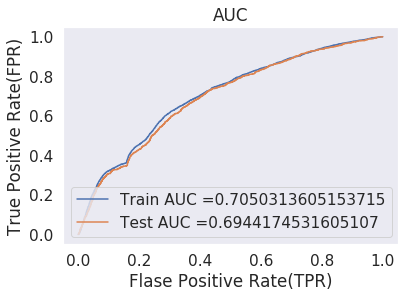

----------------------------------------------------------------------
Train accuracy:  0.8801426675514267
Test accuracy:  0.8803494415570055
----------------------------------------------------------------------
F1-Score on train set: 0.021
F1-Score on test set: 0.023
----------------------------------------------------------------------
the maximum value of tpr*(1-fpr) 0.4331014111342577 for threshold 0.11
Test confusion matrix
[[5538 2440]
 [ 428  637]]


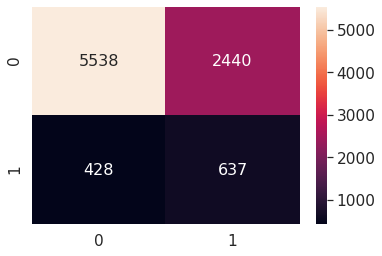

In [0]:
clf = SGDClassifier(alpha = 1.0,loss='hinge',class_weight='balanced')
clf = CalibratedClassifierCV(clf)
    
clf.fit(X_train, y_train)

y_train_pred = clf.predict_proba(X_train)[:,1]    
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Flase Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

print("-"*70)


print("Train accuracy: ",clf.score(X_train, y_train))
print("Test accuracy: ",clf.score(X_test, y_test))

print("-"*70)
y_train_new = clf.predict(X_train)
y_test_new = clf.predict(X_test)
print("F1-Score on train set: %0.3f"%(f1_score(y_train, y_train_new)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_test_new)))

print("-"*70)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test confusion matrix")
df_cmte = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)),range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cmte, annot=True,annot_kws={"size": 16}, fmt='g')
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

### XGBoost classifier

In [0]:
clf=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(clf,param_distributions=prams,verbose=10)
random_cfl.fit(X_train, y_train)
print (random_cfl.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.891, total=   5.4s
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.894, total=   4.6s
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.9s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.893, total=   4.6s
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.6s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.895, total=   4.6s
[CV] subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   19.2s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=200, max_depth=10, learning_rate=0.03, colsample_bytree=0.5, score=0.893, total=   4.6s
[CV] subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.7s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3, score=0.886, total=  13.4s
[CV] subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   37.1s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3, score=0.888, total=  13.3s
[CV] subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   50.4s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3, score=0.888, total=  13.4s
[CV] subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.1min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3, score=0.887, total=  13.2s
[CV] subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=500, max_depth=10, learning_rate=0.2, colsample_bytree=0.3, score=0.886, total=  13.2s
[CV] subsample=0.1, n_estimators=500, max_depth=5, learning_rate=0.03, colsample_bytree=0.1 
[CV]  subsample=0.1, n_estimators=500, max_depth=5, learning_rate=0.03, colsample_bytree=0.1, score=0.891, total=   3.8s
[CV] subsample=0.1, n_estimators=500, max_depth=5, learning_rate=0.03, colsample_bytree=0.1 
[CV]  subsample=0.1, n_estimators=500, max_depth=5, learning_rate=0.03, colsample_bytree=0.1, score=0.891, total=   3.8s
[CV] subsample=0.1, n_estimators=500, max_depth=5, learning_rate=0.03, colsample_bytree=0.1 
[CV]  subsample=0.1, n_estimators=500, max_depth=5, learning_rate=0.03, colsample_bytree=0.1, score=0.893, total=   3.8s
[CV] subsample=0.1, n_estimators=500, max_depth=5, learning_rate=0.03, colsample_bytree=0.1 
[CV]  subsample=0.1, n_estimators=500, max_depth=5, learning_rate=0.03, colsample_bytree=0.1, score=0.893, total=   3.8s
[CV] subsample=0.1, n_e

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.8min finished


{'subsample': 1, 'n_estimators': 2000, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.5}


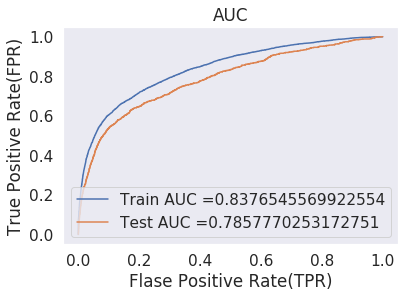

----------------------------------------------------------------------
Train accuracy:  0.9046118115461181
Test accuracy:  0.892734711931881
----------------------------------------------------------------------
F1-Score on train set: 0.423
F1-Score on test set: 0.349
----------------------------------------------------------------------
the maximum value of tpr*(1-fpr) 0.5751141972410051 for threshold 0.105
Test confusion matrix
[[6326 1652]
 [ 370  695]]


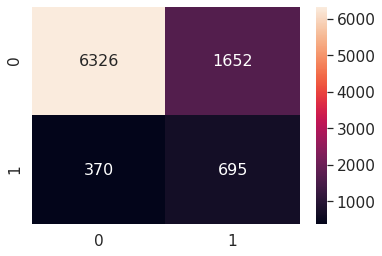

In [0]:
clf = XGBClassifier(subsample= 1, n_estimators=2000, max_depth=3, learning_rate=0.05, colsample_bytree=0.5)
    
clf.fit(X_train, y_train)

y_train_pred = clf.predict_proba(X_train)[:,1]    
y_test_pred = clf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Flase Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

print("-"*70)


print("Train accuracy: ",clf.score(X_train, y_train))
print("Test accuracy: ",clf.score(X_test, y_test))

print("-"*70)
y_train_new = clf.predict(X_train)
y_test_new = clf.predict(X_test)
print("F1-Score on train set: %0.3f"%(f1_score(y_train, y_train_new)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_test_new)))

print("-"*70)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test confusion matrix")
df_cmte = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)),range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cmte, annot=True,annot_kws={"size": 16}, fmt='g')
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

### Stacked Classifier (Logistic regression, SVM, Naive bayes)

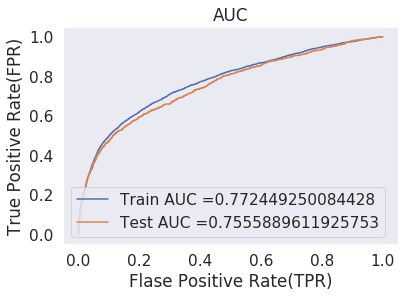

----------------------------------------------------------------------
Train accuracy:  0.8832116788321168
Test accuracy:  0.8822293486674776
----------------------------------------------------------------------
F1-Score on train set: 0.000
F1-Score on test set: 0.000
----------------------------------------------------------------------
the maximum value of tpr*(1-fpr) 0.501752623198552 for threshold 0.116
Test confusion matrix
[[5972 2006]
 [ 393  672]]


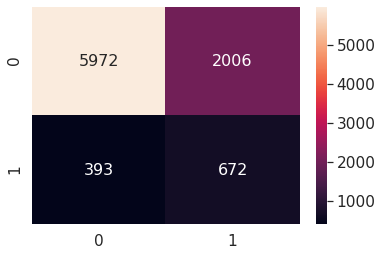

In [0]:
from mlxtend.classifier import StackingClassifier

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


sig_clf1.fit(X_train, y_train)

sig_clf2.fit(X_train, y_train)

lr = LogisticRegression(C=0.001)

sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2], meta_classifier=lr, use_probas=True)
sclf.fit(X_train, y_train)

y_train_pred = sclf.predict_proba(X_train)[:,1]    
y_test_pred = sclf.predict_proba(X_test)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)


plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Flase Positive Rate(TPR)")
plt.ylabel("True Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

print("-"*70)


print("Train accuracy: ",sclf.score(X_train, y_train))
print("Test accuracy: ",sclf.score(X_test, y_test))


print("-"*70)
y_train_new = sclf.predict(X_train)
y_test_new = sclf.predict(X_test)
print("F1-Score on train set: %0.3f"%(f1_score(y_train, y_train_new)))
print("F1-Score on test set: %0.3f"%(f1_score(y_test, y_test_new)))

print("-"*70)

from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)

print("Test confusion matrix")
df_cmte = pd.DataFrame(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)),range(2),range(2))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cmte, annot=True,annot_kws={"size": 16}, fmt='g')
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))




## Summary of model performance

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Model", "Train AUC", "Test AUC","Accuracy on train data","Accuracy on test data","F1 Score train","F1 score test"]
x.add_row(["Logistic regression",0.70,0.69,"84.1%","83.6%",0.27,0.26])
x.add_row(["Support vector machine",0.70,0.69,"88%","88%",0.21,0.23])
x.add_row(["XGBoost Classifier",0.83,0.78,"90.4%","89.2%",0.423,0.349])
x.add_row(["Stacked Classifier",0.77,0.75,"88%","88%",0,0])


print(x)

+------------------------+-----------+----------+------------------------+-----------------------+----------------+---------------+
|         Model          | Train AUC | Test AUC | Accuracy on train data | Accuracy on test data | F1 Score train | F1 score test |
+------------------------+-----------+----------+------------------------+-----------------------+----------------+---------------+
|  Logistic regression   |    0.7    |   0.69   |         84.1%          |         83.6%         |      0.27      |      0.26     |
| Support vector machine |    0.7    |   0.69   |          88%           |          88%          |      0.21      |      0.23     |
|   XGBoost Classifier   |    0.83   |   0.78   |         90.4%          |         89.2%         |     0.423      |     0.349     |
|   Stacked Classifier   |    0.77   |   0.75   |          88%           |          88%          |       0        |       0       |
+------------------------+-----------+----------+------------------------+--

XGBoost Model has performed better than other models

### Further aaproaches that can be used to improve accuracy are:

1. Using CNN or RNN models or the combination of both.
2. We can derive advance features from the data and use it on the classfiers

In [117]:
import pandas as pd
import numpy as np

# Importing libraries
from keras.models import Sequential
from keras.layers import CuDNNLSTM, LSTM
from keras.layers.core import Dense, Dropout
from keras.layers import BatchNormalization
from keras.initializers import he_normal
from keras.regularizers import l2
from keras.layers import Activation,Conv1D,MaxPool1D, Dense, Dropout, Flatten
from keras.layers import MaxPooling1D
from sklearn.model_selection import train_test_split

In [33]:
# Initializing parameters
epochs = 40
batch_size = 64
n_hidden = 32

In [129]:
X_train,X_cv,y_train,y_cv = train_test_split(X_train, y_train , stratify = y_train, train_size = 0.8)

In [135]:
X_train = X_train.todense()
X_test = X_test.todense()
X_cv = X_cv.todense()

print(X_train.shape, X_test.shape, X_cv.shape)

(28934, 79) (9043, 79) (7234, 79)


In [136]:
X_train = np.resize(X_train, new_shape=(28934,79,1))
X_test = np.resize(X_test, new_shape=(9043,79,1))
X_cv = np.resize(X_cv, new_shape=(7234,79,1))

In [139]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_cv = to_categorical(y_cv)

In [148]:
import keras
from keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from keras.layers import Flatten, Reshape
from keras.layers import concatenate, GRU, Input
from keras.models import Model
from time import time
from keras.callbacks import TensorBoard

# define CNN model
inputs = Input(shape=(79,1),name="other_input")
x = Conv1D(filters=32,kernel_size=3,strides=1)(inputs)
x = CuDNNLSTM(64,return_sequences=True)(x)
x = Flatten()(x)

x = Dense(64,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.3)(x)
x = BatchNormalization()(x)
x = Dense(126,activation='relu',kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)

output = Dense(2, activation = 'softmax')(x)
 
model = Model(inputs, output)

#To visualize, run -  tensorboard --log_dir=logs/ in command prompt

tensorboard = TensorBoard(log_dir="logs/".format(time))

model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4), metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
other_input (InputLayer)     (None, 79, 1)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 77, 32)            128       
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, 77, 64)            25088     
_________________________________________________________________
flatten_8 (Flatten)          (None, 4928)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 64)                315456    
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 64)                256       
__________

In [149]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

model.fit(X_train, y_train, epochs=30, verbose=1, batch_size=100, validation_data=(X_cv, y_cv), callbacks=[tensorboard,checkpoint])

Train on 28934 samples, validate on 7234 samples
Epoch 1/30
28934/28934 [==============================] - 6s 209us/step - loss: 0.3646 - acc: 0.8828 - val_loss: 0.3404 - val_acc: 0.8889

Epoch 00001: val_acc improved from -inf to 0.88886, saving model to weights.hdf5
Epoch 2/30
28934/28934 [==============================] - 5s 159us/step - loss: 0.3378 - acc: 0.8884 - val_loss: 0.3632 - val_acc: 0.8875

Epoch 00002: val_acc did not improve from 0.88886
Epoch 3/30
28934/28934 [==============================] - 4s 155us/step - loss: 0.3298 - acc: 0.8899 - val_loss: 0.3328 - val_acc: 0.8900

Epoch 00003: val_acc improved from 0.88886 to 0.88996, saving model to weights.hdf5
Epoch 4/30
28934/28934 [==============================] - 5s 156us/step - loss: 0.3212 - acc: 0.8904 - val_loss: 0.3177 - val_acc: 0.8925

Epoch 00004: val_acc improved from 0.88996 to 0.89245, saving model to weights.hdf5
Epoch 5/30
28934/28934 [==============================] - 8s 262us/step - loss: 0.3166 - acc: 0.

In [150]:
prediction = model.predict(X_test)

In [151]:
prediction

array([[0.17366222, 0.8263378 ],
       [0.9457297 , 0.05427029],
       [0.9406856 , 0.05931438],
       ...,
       [0.7895888 , 0.2104112 ],
       [0.9014441 , 0.09855588],
       [0.9161622 , 0.08383785]], dtype=float32)

----Done